In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0
torchvision version: 0.16.0


In [3]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1764949.99it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 3069624.40it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1706068.22it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [4]:
# see first sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
# how many samples?
len(train_data.data), len(test_data.data)

(60000, 10000)

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

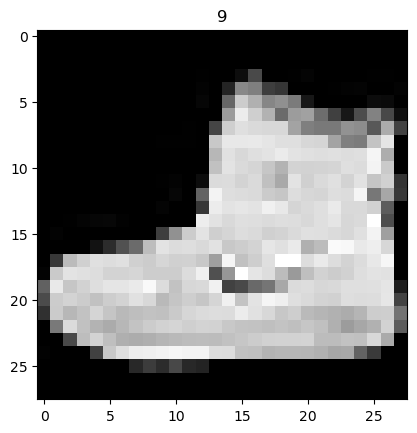

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)

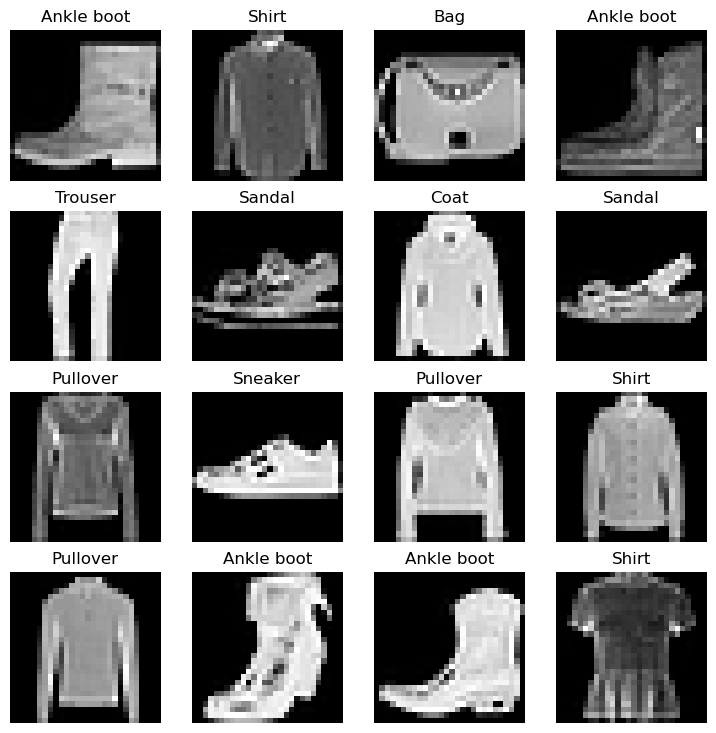

In [13]:
# plot some more
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [14]:
from torch.utils.data import DataLoader

# setup the batch size
BATCH_SIZE = 32

# Turn datasets into iterable batches
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=True)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002A077CA2D70>, <torch.utils.data.dataloader.DataLoader object at 0x000002A077CA3220>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
# Model, prepare a baseline model

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [17]:
# define model

class FashionMNIST(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.flatten = nn.Flatten()

        self.LinReluStack = nn.Sequential(
            nn.Linear(28*28, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.LinReluStack(x)
        return output
    
model1 = FashionMNIST()
model1

FashionMNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (LinReluStack): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.01)

In [24]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------------")
    ### Training
    train_loss = 0
    # looping thru batches
    for batch, (X, y) in enumerate(train_dataloader):
        model1.train()
        # 1. forward pass
        y_pred = model1(X)
        
        # 2. loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    # Divide total train loss by lentgth of train dataloader to get AVG loss
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. forward pass
            test_pred = model1(X)

            # 2. calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3. calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:19<01:17, 19.49s/it]


Train loss: 0.42839 | Test loss: 0.44944, Test acc: 84.05%

Epoch: 1
---------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:38<00:58, 19.37s/it]


Train loss: 0.41598 | Test loss: 0.46411, Test acc: 83.81%

Epoch: 2
---------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [00:58<00:39, 19.61s/it]


Train loss: 0.40512 | Test loss: 0.43658, Test acc: 84.72%

Epoch: 3
---------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [01:19<00:20, 20.13s/it]


Train loss: 0.39567 | Test loss: 0.43734, Test acc: 84.76%

Epoch: 4
---------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [01:39<00:00, 19.81s/it]


Train loss: 0.38761 | Test loss: 0.42052, Test acc: 85.00%



In [23]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_1_results = eval_model(model=model1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_1_results

{'model_name': 'FashionMNIST',
 'model_loss': 0.47002169489860535,
 'model_acc': 83.2567891373802}

In [25]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [27]:
device = "cpu"
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [38]:
epochs = 3

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------------")
    ### Training
    train_loss = 0
    # looping thru batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        # 1. forward pass
        y_pred = model_2(X)
        
        # 2. loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            print(loss)
    # Divide total train loss by lentgth of train dataloader to get AVG loss
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. forward pass
            test_pred = model_2(X)

            # 2. calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3. calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------
Looked at 0/60000 samples
tensor(0.7245, grad_fn=<NllLossBackward0>)
Looked at 12800/60000 samples
tensor(0.3249, grad_fn=<NllLossBackward0>)
Looked at 25600/60000 samples
tensor(0.2830, grad_fn=<NllLossBackward0>)
Looked at 38400/60000 samples
tensor(0.1273, grad_fn=<NllLossBackward0>)
Looked at 51200/60000 samples
tensor(0.3164, grad_fn=<NllLossBackward0>)


 33%|███▎      | 1/3 [00:53<01:47, 53.98s/it]


Train loss: 0.30470 | Test loss: 0.31407, Test acc: 88.67%

Epoch: 1
---------------
Looked at 0/60000 samples
tensor(0.4872, grad_fn=<NllLossBackward0>)
Looked at 12800/60000 samples
tensor(0.2324, grad_fn=<NllLossBackward0>)
Looked at 25600/60000 samples
tensor(0.4185, grad_fn=<NllLossBackward0>)
Looked at 38400/60000 samples
tensor(0.2943, grad_fn=<NllLossBackward0>)
Looked at 51200/60000 samples
tensor(0.6260, grad_fn=<NllLossBackward0>)


 67%|██████▋   | 2/3 [01:47<00:53, 53.88s/it]


Train loss: 0.29218 | Test loss: 0.30094, Test acc: 89.21%

Epoch: 2
---------------
Looked at 0/60000 samples
tensor(0.5709, grad_fn=<NllLossBackward0>)
Looked at 12800/60000 samples
tensor(0.2084, grad_fn=<NllLossBackward0>)
Looked at 25600/60000 samples
tensor(0.1115, grad_fn=<NllLossBackward0>)
Looked at 38400/60000 samples
tensor(0.1842, grad_fn=<NllLossBackward0>)
Looked at 51200/60000 samples
tensor(0.1513, grad_fn=<NllLossBackward0>)


100%|██████████| 3/3 [02:39<00:00, 53.32s/it]


Train loss: 0.28200 | Test loss: 0.29516, Test acc: 89.28%



Making predictions: 100%|██████████| 313/313 [00:02<00:00, 128.60it/s]


In [41]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [66]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=10000):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [67]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.5946e-08, 5.3748e-09, 8.9701e-09, 1.3692e-09, 5.8580e-10, 9.9998e-01,
         2.6576e-08, 7.0135e-07, 2.7140e-07, 1.6266e-05],
        [1.4586e-02, 9.2133e-01, 8.0488e-04, 1.3154e-02, 3.5869e-02, 3.3524e-04,
         1.3182e-02, 2.7736e-04, 1.8414e-04, 2.7752e-04]])

In [68]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
import numpy as np
test_labels_tensor = torch.from_numpy(np.array(test_labels))

In [69]:
torch.sum(torch.eq(pred_classes, test_labels_tensor)).item()/pred_classes.nelement()

0.893

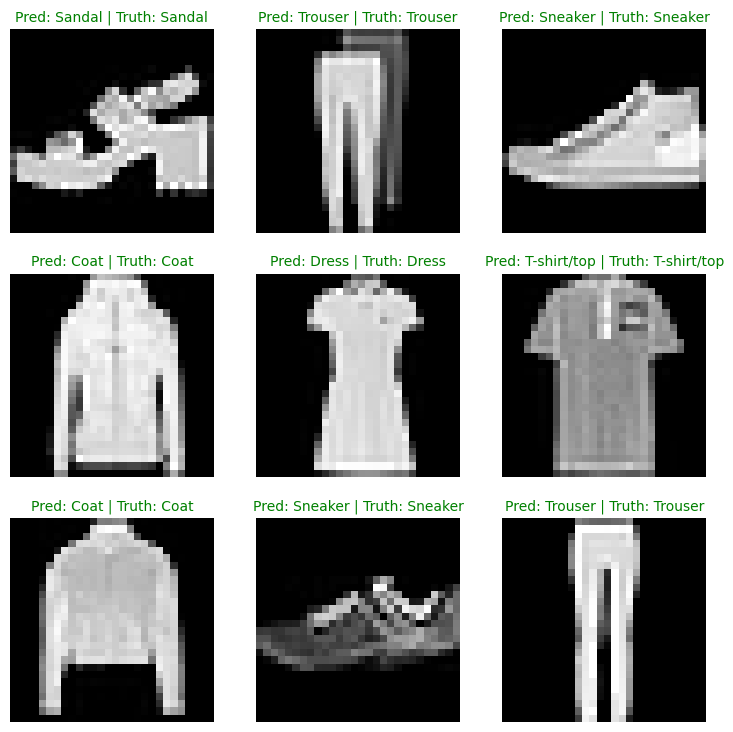

In [45]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [46]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred)
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:02<00:00, 119.28it/s]


In [70]:
def confusion(prediction, truth):
    confusion_vector = prediction / truth

    true_positives = torch.sum(confusion_vector == 1).item()
    false_positives = torch.sum(confusion_vector == float('inf')).item()
    true_negatives = torch.sum(torch.isnan(confusion_vector)).item()
    false_negatives = torch.sum(confusion_vector == 0).item()

    return true_positives, false_positives, true_negatives, false_negatives

confusion(pred_classes, test_labels_tensor)

(8057, 127, 873, 214)

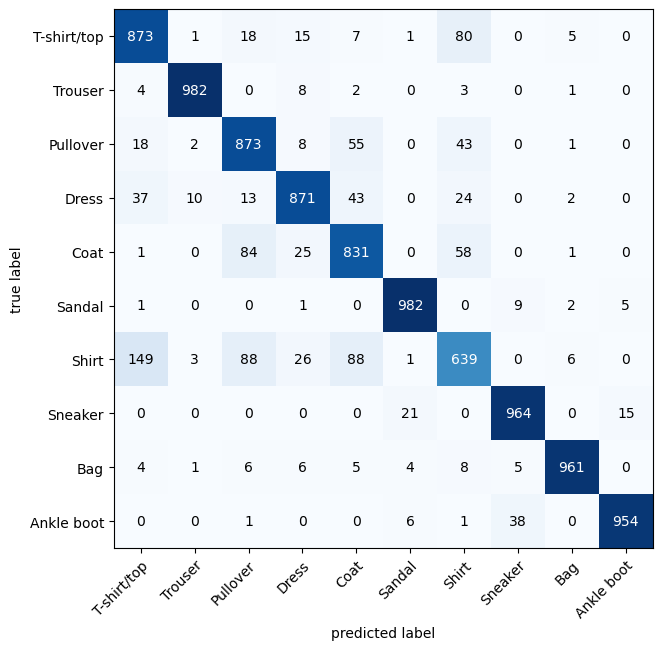

In [71]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=pred_classes,
                         target=test_labels_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [1]:
# Exersize

# Overfitting:
# happens when model fits training data too closely
# How to prevent it?
# More training data, less complex model, regularization



In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [4]:
train_data = datasets.MNIST(
    root="C:/Users/ondra/Python Projects/datasets/MNIST",
    train=True,
    transform=ToTensor(),
    download=False
)

test_data = datasets.MNIST(
    root="C:/Users/ondra/Python Projects/datasets/MNIST",
    train=False,
    transform=ToTensor(),
    download=False
)

Text(0.5, 1.0, '5')

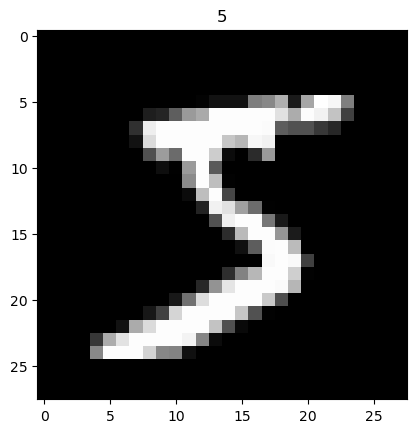

In [12]:
class_names = train_data.classes

image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)

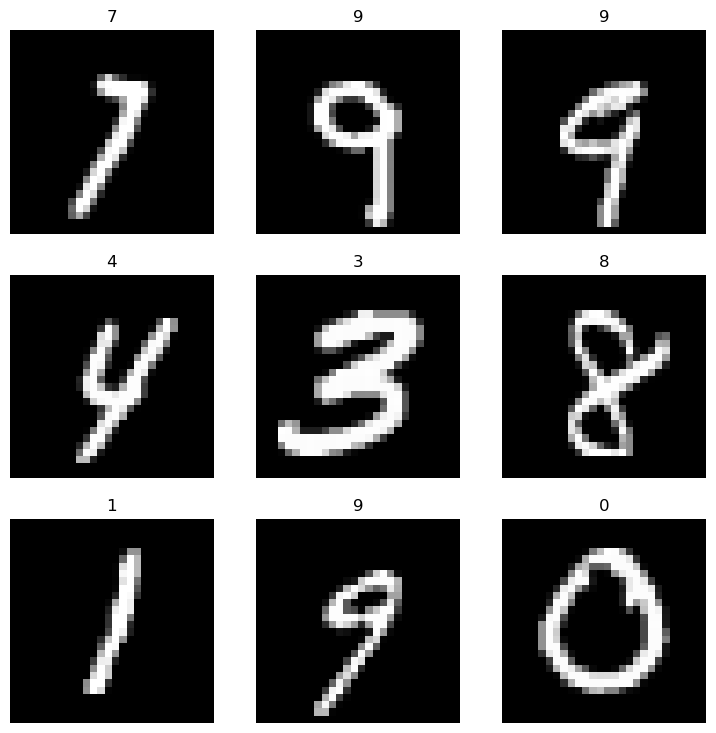

: 

In [17]:
rows, cols = 3, 3
fig = plt.figure(figsize=(9, 9))

for i in range(1, rows*cols + 1):
    idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)